<a href="https://colab.research.google.com/github/Domalde/BR-Stocks/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **IMPORTANDO BIBLIOTECAS**

In [165]:
pip install dataframe_image

In [166]:
pip install python-docx

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from pandas.plotting import table
import dataframe_image as dfi
from docx import Document
import os
from PIL import Image

#### **LENDO O BANCO DE DADOS**

In [168]:
def database(tabela_user):

  # Importa o arquivo .xlsx contendo os dados
  data = pd.read_excel(tabela_user)

  # Cria DataFrame a ser preenchido
  count = data['Município'].value_counts()
  unique_elements = list(count.index)
  tamanho = np.zeros(len(unique_elements), dtype=int)

  data_2 = {'Municípios' : unique_elements ,
            'NC' : np.linspace(1, len(unique_elements), len(unique_elements), dtype=int),
            'Amostras' : list(count),
            'Coliformes Totais': tamanho,
            '% Coliformes Totais': tamanho,
            'Conceito (CT)': tamanho,
            'Cloro': tamanho,
            '% Cloro': tamanho,
            'Conceito (Cloro)': tamanho,
            'Turbidez': tamanho,
            '% Turbidez': tamanho,
            'Conceito (Turbidez)': tamanho}

  df = pd.DataFrame(data_2)
  df.set_index('Municípios', inplace=True)

  return(data, count, unique_elements, tamanho, df)

#### **ANÁLISES**

In [169]:
def analise(unique_elements, count, data):

  amostras_fora_padrao_coliformes = {}
  amostras_fora_padrao_cloro = {}
  amostras_fora_padrao_turbidez = {}

  for k in unique_elements:
    amostras_fora_padrao_coliformes[k] = 0
    amostras_fora_padrao_cloro[k] = 0
    amostras_fora_padrao_turbidez [k] = 0

  for city in unique_elements:

    nv = count[city]

    for i in range(1, nv+1):
      line = data[(data['Município'] == city) & (data['Data da Amostragem'] == i)]
      coliformes = line['Coliformes Totais (Presença/Ausência)'].values[0]
      cloro = line['Cloro Residual Livre (mg/L)'].values[0]
      turbidez = line['Turbidez (NTU)'].values[0]

      if coliformes == 'B':
        amostras_fora_padrao_coliformes[city] = amostras_fora_padrao_coliformes[city] + 1

      if cloro > 2:
        amostras_fora_padrao_cloro[city] = amostras_fora_padrao_cloro[city] + 1

      if turbidez > 5:
        amostras_fora_padrao_turbidez[city] = amostras_fora_padrao_turbidez[city] + 1

  for p in unique_elements:

    df.loc[p, 'Coliformes Totais'] = amostras_fora_padrao_coliformes[p]
    df.loc[p, '% Coliformes Totais'] = round(((amostras_fora_padrao_coliformes[p] / count [p])*100), 2)

    if df.loc[p, '% Coliformes Totais'] > 15:
      df.loc[p, 'Conceito (CT)'] = 'Ruim'

    else:
      if df.loc[p, '% Coliformes Totais'] > 5:
        df.loc[p, 'Conceito (CT)'] = 'Mediano'

      else:
        if df.loc[p, '% Coliformes Totais'] > 1:
          df.loc[p, 'Conceito (CT)'] = 'Bom'

        else:
          df.loc[p, 'Conceito (CT)'] = 'Excelente'

    df.loc[p, 'Cloro'] = amostras_fora_padrao_cloro[p]
    df.loc[p, '% Cloro'] = round(((amostras_fora_padrao_cloro[p] / count [p])*100), 2)

    if df.loc[p, '% Cloro'] > 15:
      df.loc[p, 'Conceito (Cloro)'] = 'Ruim'

    else:
      if df.loc[p, '% Cloro'] > 5:
        df.loc[p, 'Conceito (Cloro)'] = 'Mediano'

      else:
        if df.loc[p, '% Cloro'] > 1:
          df.loc[p, 'Conceito (Cloro)'] = 'Bom'

        else:
            df.loc[p, 'Conceito (Cloro)'] = 'Excelente'

    df.loc[p, 'Turbidez'] = amostras_fora_padrao_turbidez[p]
    df.loc[p, '% Turbidez'] = round(((amostras_fora_padrao_turbidez[p] / count [p])*100), 2)

    if df.loc[p, '% Turbidez'] > 15:
      df.loc[p, 'Conceito (Turbidez)'] = 'Ruim'

    else:
      if df.loc[p, '% Turbidez'] > 5:
        df.loc[p, 'Conceito (Turbidez)'] = 'Mediano'

      else:
        if df.loc[p, '% Turbidez'] > 1:
          df.loc[p, 'Conceito (Turbidez)'] = 'Bom'

        else:
          df.loc[p, 'Conceito (Turbidez)'] = 'Excelente'

  return df

**Plot Tabela**

In [170]:
def plottabela(df):

  fig, ax = plt.subplots(figsize=(14, 4))

  tbl = table(ax, df, loc='center', cellLoc='center')

  for key, cell in tbl.get_celld().items():
      cell.set_text_props(fontweight='bold')
      if key[0] == 0:
          cell.set_height(cell.get_height() * 2)

  for c1 in range (len(df.index)):
    if df['Conceito (CT)'][c1] == 'Ruim':
      tbl[(c1+1, 4)].set_facecolor('lightcoral')


    if df['Conceito (CT)'][c1] == 'Mediano':
      tbl[(c1+1, 4)].set_facecolor('yellow')


    if df['Conceito (Cloro)'][c1] == 'Ruim':
      tbl[(c1+1, 7)].set_facecolor('lightcoral')


    if df['Conceito (Cloro)'][c1] == 'Mediano':
      tbl[(c1+1, 7)].set_facecolor('yellow')


    if df['Conceito (Turbidez)'][c1] == 'Ruim':
      tbl[(c1+1, 10)].set_facecolor('lightcoral')


    if df['Conceito (Turbidez)'][c1] == 'Mediano':
      tbl[(c1+1, 10)].set_facecolor('yellow')


  tbl.auto_set_font_size(False)
  tbl.set_fontsize(12)
  tbl.scale(1.9, 1.9)

  ax.axis('off')

  tabela = plt.savefig('tabela.png', bbox_inches='tight', pad_inches=0.5, dpi=300)

  # Abrir uma imagem
  img = Image.open('tabela.png')

  # Definir as novas dimensões desejadas (largura, altura)
  nova_largura = 700
  nova_altura = 250

  # Redimensionar a imagem com antialiasing (boa qualidade)
  img_redimensionada = img.resize((nova_largura, nova_altura), Image.ANTIALIAS)

  # Salvar a imagem redimensionada
  img_redimensionada.save('tabela.png')

  return

**Plot Gráfico**

In [171]:
def plotgrafico (df):
  plt.figure(figsize=(8, 3))

  plt.bar(df.index, df['% Coliformes Totais'], width=0.5, label='COLIFORMES TOTAIS')
  plt.bar(df.index, df['% Cloro'], width=0.5 , label='CLORO')
  plt.bar(df.index, df['% Turbidez'], width=0.5, label = 'TURBIDEZ')

  font_prop = FontProperties(weight='bold', style='normal', size='small', family='sans-serif')
  plt.xlabel('MUNICÍPIOS').set_fontproperties(font_prop)
  plt.ylabel('% DE AMOSTRAS FORA DO PADRÃO').set_fontproperties(font_prop)

  plt.xticks(rotation=45, ha='right', size=8, fontfamily='sans-serif', stretch='extra-condensed')

  plt.legend()

  plt.grid(True)

  grafico = plt.savefig('grafico.png', bbox_inches='tight', pad_inches=0.1, dpi=90)

  return grafico

#### **INFORMAÇÕES OBSERVADAS**



######   **Elencando municípios e percentuais fora do padrão**




In [172]:
def padroes(unique_elements, df):
  fora_padrao_coliformes_cidade = []
  fora_padrao_coliformes_pc = []

  fora_padrao_cloro_cidade = []
  fora_padrao_cloro_pc = []

  fora_padrao_turbidez_cidade = []
  fora_padrao_turbidez_pc = []


  for u in unique_elements:
    if df['Conceito (CT)'][u] == 'Ruim' or df['Conceito (CT)'][u] == 'Mediano':
      fora_padrao_coliformes_cidade.append(u)
      fora_padrao_coliformes_pc.append (df['% Coliformes Totais'][u])

    if df['Conceito (Cloro)'][u] == 'Ruim' or df['Conceito (Cloro)'][u] == 'Mediano':
      fora_padrao_cloro_cidade.append(u)
      fora_padrao_cloro_pc.append (df['% Cloro'][u])

    if df['Conceito (Turbidez)'][u] == 'Ruim' or df['Conceito (Turbidez)'][u] == 'Mediano':
      fora_padrao_turbidez_cidade.append(u)
      fora_padrao_turbidez_pc.append (df['% Turbidez'][u])


  # Resultados para coliformes

  if len(fora_padrao_coliformes_cidade)>0:
    MUNICIPIOS_COLIFORMES = fora_padrao_coliformes_cidade[0]
    PERCENTUAIS_COLIFORMES = fora_padrao_coliformes_pc[0]

    for x in range (1, len(fora_padrao_coliformes_cidade)-1):
      MUNICIPIOS_COLIFORMES = MUNICIPIOS_COLIFORMES + ' , ' + fora_padrao_cloriformes_cidade[x]
      PERCENTUAIS_COLIFORMES = str(PERCENTUAIS_COLIFORMES) + ' , ' + str(fora_padrao_cloriformes_pc[x])

    if len(fora_padrao_coliformes_cidade)>1:
      MUNICIPIOS_COLIFORMES = MUNICIPIOS_COLIFORMES + ' e ' + fora_padrao_coliformes_cidade[-1]
      PERCENTUAIS_COLIFORMES = PERCENTUAIS_COLIFORMES + ' e ' + str(fora_padrao_coliformes_pc[-1])

  # Resultados para cloro

  if len(fora_padrao_cloro_cidade)>0:
    MUNICIPIOS_CLORO = fora_padrao_cloro_cidade[0]
    PERCENTUAIS_CLORO = fora_padrao_cloro_pc[0]

    for x in range (1, len(fora_padrao_cloro_cidade)-1):
      MUNICIPIOS_CLORO = MUNICIPIOS_CLORO + ', ' + fora_padrao_cloro_cidade[x]
      PERCENTUAIS_CLORO = str(PERCENTUAIS_CLORO) + ', ' + str(fora_padrao_cloro_pc[x])

    if len(fora_padrao_cloro_cidade)>1:
      MUNICIPIOS_CLORO = MUNICIPIOS_CLORO + ' e ' + fora_padrao_cloro_cidade[-1]
      PERCENTUAIS_CLORO = PERCENTUAIS_CLORO + ' e ' + str(fora_padrao_cloro_pc[-1])

  # Resultados para turbidez

  if len(fora_padrao_turbidez_cidade)>0:
    MUNICIPIOS_TURBIDEZ = fora_padrao_turbidez_cidade[0]
    PERCENTUAIS_TURBIDEZ = fora_padrao_turbidez_pc[0]

    for x in range (1, len(fora_padrao_turbidez_cidade)-1):
      MUNICIPIOS_TURBIDEZ = MUNICIPIOS_TURBIDEZ +  ', ' + fora_padrao_turbidez_cidade[x]
      PERCENTUAIS_TURBIDEZ = str(PERCENTUAIS_TURBIDEZ) + ', ' + str(fora_padrao_turbidez_pc[x])

    if len(fora_padrao_turbidez_cidade)>1:
      MUNICIPIOS_TURBIDEZ = MUNICIPIOS_TURBIDEZ + ' e ' + fora_padrao_turbidez_cidade[-1]
      PERCENTUAIS_TURBIDEZ = PERCENTUAIS_TURBIDEZ + ' e ' + str(fora_padrao_turbidez_pc[-1])

  # Construir texto geral

  txt_geral = ' '

  if (len(fora_padrao_coliformes_cidade)) > 0:
    txt_coliformes = 'Em relação à análise de coliformes totais, os municípios de ' + MUNICIPIOS_COLIFORMES + ' estão com ' + PERCENTUAIS_COLIFORMES.replace('.',',') + ' % acima do valor de amostras de não conformidades aceita pela resolução, respectivamente.'
    txt_geral = txt_cloro

  if (len(fora_padrao_cloro_cidade)) > 0:
    txt_cloro = 'Em relação à análise de cloro, os municípios de ' + MUNICIPIOS_CLORO + ' estão com ' + PERCENTUAIS_CLORO.replace('.',',')  + ' % acima do valor de amostras de não conformidades aceita pela resolução, respectivamente.'
    if txt_geral == ' ':
      txt_geral = txt_cloro
    else:
      txt_geral = txt_geral + ' ' + txt_cloro

  if (len(fora_padrao_turbidez_cidade)) > 0:
    txt_turbidez = 'Em relação à análise de turbidez, os municípios de ' + MUNICIPIOS_TURBIDEZ + ' estão com ' + PERCENTUAIS_TURBIDEZ.replace('.',',') + ' % acima do valor de amostras de não conformidades aceita pela resolução, respectivamente.'
    if txt_geral == ' ':
      txt_geral = txt_turbidez
    else:
      txt_geral = txt_geral + ' ' + txt_turbidez


  if len(fora_padrao_coliformes_cidade) > 0:
    padroes_ruins = 'coliformes totais'

    if len(fora_padrao_cloro_cidade) > 0 and len(fora_padrao_turbidez_cidade) >0:
      padroes_ruins = padroes_ruins + ', cloro e turbidez'

      if len(fora_padrao_turbidez_cidade) > 0:
        padroes_ruins = padroes_ruins + ' e turbidez'

  else:
    if len(fora_padrao_cloro_cidade) > 0:
      padroes_ruins = 'cloro'

      if len(fora_padrao_turbidez_cidade) > 0:
        padroes_ruins = padroes_ruins + ' e turbidez'

    else:
      if len(fora_padrao_turbidez_cidade) > 0:
        padroes_ruins = 'turbidez'

  return (padroes_ruins, txt_geral)


######   **Municipios com históricos de não conformidade**



In [173]:
def historico_nc(MUNICIPIOS_HISTORICO_N_CONFORMIDADE, MESES, PROCESSOS):

    txt_2_municipios = MUNICIPIOS_HISTORICO_N_CONFORMIDADE[0]
    txt_mes_processo = MESES[0] + ', no âmbito do processo de '+ PROCESSOS[0]

    for z in range (1, len(MESES)-1):
      txt_mes_processo = txt_mes_processo + ', ' + MESES[z] + ', no âmbito do processo de ' + PROCESSOS[z]

    for r in range (1, len(MUNICIPIOS_HISTORICO_N_CONFORMIDADE)-1):
      txt_2_municipios = txt_2_municipios + ', ' + MUNICIPIOS_HISTORICO_N_CONFORMIDADE[r]


    if len(MUNICIPIOS_HISTORICO_N_CONFORMIDADE)>1:
      txt_2_municipios = txt_2_municipios + ' e ' + MUNICIPIOS_HISTORICO_N_CONFORMIDADE[-1]

    if len(MESES)>1:
      txt_mes_processo = txt_mes_processo + ' e ' + MESES[-1] + ', no âmbito do processo de ' + PROCESSOS[-1]

      return (txt_2_municipios, txt_mes_processo)

In [174]:
def criar_historico(HISTORICO_N_CONFORMES, fora_padrao_cloriformes_cidade, fora_padrao_cloro_cidade, fora_padrao_turbidez_cidade):

  r = 0

  if HISTORICO_N_CONFORMES['Municípios'][0] != 'N':

    print(fora_padrao_coliformes_cidade)
    print(fora_padrao_cloro_cidade)
    print(fora_padrao_turbidez_cidade)

    if len(fora_padrao_coliformes_cidade)>0 and len(fora_padrao_cloro_cidade)>0 and len(fora_padrao_turbidez_cidade)>0:

      for ma in fora_padrao_coliformes_cidade:
        for mb in fora_padrao_cloro_cidade:
          for mc in fora_padrao_turbidez_cidade:
            for m11 in HISTORICO_N_CONFORMES['Municípios']:

              if r<1:

                if ma == m1 or mb == m1 or mc == m1:

                  hist = historico_nc(HISTORICO_N_CONFORMES['Municípios'], HISTORICO_N_CONFORMES['Meses'], HISTORICO_N_CONFORMES['Processos'])

                  r = r + 1
    else:

      if len(fora_padrao_cloro_cidade)>0 and len(fora_padrao_turbidez_cidade)>0:

        for mb in fora_padrao_cloro_cidade:
            for mc in fora_padrao_turbidez_cidade:
              for m1 in HISTORICO_N_CONFORMES['Municípios']:

                if r<1:

                  if mb == m1 or mc == m1:

                    hist = historico_nc(HISTORICO_N_CONFORMES['Municípios'], HISTORICO_N_CONFORMES['Meses'], HISTORICO_N_CONFORMES['Processos'])

                    r = r + 1
      else:

          if len(fora_padrao_coliformes_cidade)>0 and len(fora_padrao_turbidez_cidade)>0:

            for mb in fora_padrao_coliformes_cidade:
                for mc in fora_padrao_turbidez_cidade:
                  for m1 in HISTORICO_N_CONFORMES['Municípios']:

                    if r<1:

                      if mb == m1 or mc == m1:

                        hist = historico_nc(HISTORICO_N_CONFORMES['Municípios'], HISTORICO_N_CONFORMES['Meses'], HISTORICO_N_CONFORMES['Processos'])

                        r = r + 1

          else:

              if len(fora_padrao_coliformes_cidade)>0 and len(fora_padrao_cloro_cidade)>0:

                for mb in fora_padrao_cloro_cidade:
                    for mc in fora_padrao_coliformes_cidade:
                      for m1 in HISTORICO_N_CONFORMES['Municípios']:

                        if r<1:

                          if mb == m1 or mc == m1:

                            hist = historico_nc(HISTORICO_N_CONFORMES['Municípios'], HISTORICO_N_CONFORMES['Meses'], HISTORICO_N_CONFORMES['Processos'])

                            r = r + 1

              else:

                  if len(fora_padrao_coliformes_cidade)>0:

                    for mc in fora_padrao_coliformes_cidade:
                        for m1 in HISTORICO_N_CONFORMES['Municípios']:

                          if r<1:

                            if mc == m1:

                              hist = historico_nc(HISTORICO_N_CONFORMES['Municípios'], HISTORICO_N_CONFORMES['Meses'], HISTORICO_N_CONFORMES['Processos'])

                              r = r + 1
                  else:

                    if len(fora_padrao_cloro_cidade)>0:

                      for mc in fora_padrao_cloro_cidade:
                          for m1 in HISTORICO_N_CONFORMES['Municípios']:

                            if r<1:

                              if mc == m1:

                                hist = historico_nc(HISTORICO_N_CONFORMES['Municípios'], HISTORICO_N_CONFORMES['Meses'], HISTORICO_N_CONFORMES['Processos'])

                                r = r + 1

                    else:

                      if len(fora_padrao_turbidez_cidade)>0:

                        for mc2 in fora_padrao_turbidez_cidade:
                            for m1 in HISTORICO_N_CONFORMES['Municípios']:

                              if r<1:

                                if mc2 == m1:

                                  hist = historico_nc(HISTORICO_N_CONFORMES['Municípios'], HISTORICO_N_CONFORMES['Meses'], HISTORICO_N_CONFORMES['Processos'])

                                  r = r + 1

    return hist

###### **Não conformidade**

In [175]:
def ncs(df):

  NCS = []

  for q in range (1, len(df['NC'])):
    if df['Conceito (CT)'][q] == 'Ruim' and df['Conceito (Cloro)'][q] == 'Ruim' and df['Conceito (Turbidez)'][q] == 'Ruim':
      NCS.append('NC' + str(q+1) + '- Valores de Coliformes Totais, Cloro e Turbidez acima do indicado pela Portaria nº 888/2021 do Ministério da Saúde.')

    elif df['Conceito (CT)'][q] == 'Ruim' and df['Conceito (Cloro)'][q] == 'Ruim':
      NCS.append('NC' + str(q+1) + '- Valores de Coliformes Totais e Cloro acima do indicado pela Portaria nº 888/2021 do Ministério da Saúde.')

    elif df['Conceito (CT)'][q] == 'Ruim' and df['Conceito (Turbidez)'][q] == 'Ruim':
      NCS.append('NC' + str(q+1) + '- Valores de Coliformes Totais e Turbidez acima do indicado pela Portaria nº 888/2021 do Ministério da Saúde.')

    elif df['Conceito (Cloro)'][q] == 'Ruim' and df['Conceito (Turbidez)'][q] == 'Ruim':
      NCS.append('NC' + str(q+1) + '- Valores de Cloro e Turbidez acima do indicado pela Portaria nº 888/2021 do Ministério da Saúde.')

    elif df['Conceito (CT)'][q] == 'Ruim':
      NCS.append('NC' + str(q+1) + '- Valores de Coliformes Totais acima do indicado pela Portaria nº 888/2021 do Ministério da Saúde.')

    elif df['Conceito (Cloro)'][q] == 'Ruim':
      NCS.append('NC' + str(q+1) + '- Valores de Cloro acima do indicado pela Portaria nº 888/2021 do Ministério da Saúde.')

    elif df['Conceito (Turbidez)'][q] == 'Ruim':
      NCS.append('NC' + str(q+1) + '- Valores de Turbidez acima do indicado pela Portaria nº 888/2021 do Ministério da Saúde.')

  if len(NCS) > 0:
    ncs_text = NCS[0]
    for b in range (1, len(NCS)-1):
      ncs_text = ncs_text + " / " + NCS[b]

    if len(NCS) > 1:
      ncs_text = ncs_text + " / " + NCS[-1]

  return ncs_text

#### **EDITANDO DOCUMENTO**

In [176]:
def var_doc (HISTORICO_N_CONFORMES, hist, MES_INDICADOR, ANO_INDICADOR, MES_DOCUMENTO, ANO_DOCUMENTO, N_PROCESSO, PRESTADOR, txt_geral, PRESTADOR_COMPLETO, padroes_ruins, ncs_text):

  if HISTORICO_N_CONFORMES['Municípios'][0] != 'N':

    part1 = f'Destaca-se que a não conformidade identificada neste relatório, concernente ao município de {hist[0]},'
    part2 = f'também foi objeto de registro nos relatórios mensais referentes aos meses de {hist[1]}. Tal repetição da não conformidade ressalta a importância de adotar uma abordagem sistemática e proativa na resolução destas questões.'

    var_dic = {
              '$MES_AN': MES_INDICADOR.upper(),
              '$ANO_AN': str(ANO_INDICADOR),
              '$MES_DOC': MES_DOCUMENTO,
              '$ANO_DOC': str(ANO_DOCUMENTO),
              'MMMM': MES_INDICADOR,
              'YYYY': str(ANO_INDICADOR),
              'XXXX': str(ANO_DOCUMENTO),
              'PPPP': N_PROCESSO,
              '$PRESTADOR': PRESTADOR,
              '$RESULTADOSIND': txt_geral,
              '$FULLNAME': PRESTADOR_COMPLETO,
              '$PADRAORUIM': padroes_ruins,
              '$CIDADEHISTORICO': part1,
              '$HISTORICO': part2,
              '$NC': ncs_text
              }

  else:

    var_dic = {
                '$MES_AN': MES_INDICADOR.upper(),
                '$ANO_AN': str(ANO_INDICADOR),
                '$MES_DOC': MES_DOCUMENTO,
                '$ANO_DOC': str(ANO_DOCUMENTO),
                'MMMM': MES_INDICADOR,
                'YYYY': str(ANO_INDICADOR),
                'XXXX': str(ANO_DOCUMENTO),
                'PPPP': N_PROCESSO,
                '$PRESTADOR': PRESTADOR,
                '$RESULTADOSIND': txt_geral,
                '$FULLNAME': PRESTADOR_COMPLETO,
                '$PADRAORUIM': padroes_ruins,
                '$CIDADEHISTORICO': '',
                '$HISTORICO': '',
                '$NC': ncs_text
                }

  return var_dic

In [177]:
# Função para realizar as substituições
def substituir_var(documento, var_dic):
  doc = Document(documento)

  # Substitui marcadores pelo valor do dic
  for p in doc.paragraphs:
    for k, value in var_dic.items():
      if k in p.text:
        inline = p.runs
        for i in range(len(inline)):
          if k in inline[i].text:
            text = inline[i].text.replace(k, value)
            inline[i].text = text

  # Busca marcador e o substitui pela imagem
  for paragraph in doc.paragraphs:
    if 'MGMG' in paragraph.text:
      inline = paragraph.runs
      for i in range(len(inline)):
        if 'MGMG' in inline[i].text:
          text = inline[i].text.replace('MGMG', '')
          inline[i].text = text
          run = paragraph.add_run()
          run.add_picture('tabela.png')
          break

  for paragraph in doc.paragraphs:
    if 'MTMT' in paragraph.text:
      inline = paragraph.runs
      for i in range(len(inline)):
        if 'MTMT' in inline[i].text:
          text = inline[i].text.replace('MTMT', '')
          inline[i].text = text
          run = paragraph.add_run()
          run.add_picture('grafico.png')
          break

  return doc

**FUNÇÃO PRINCIPAL**

In [178]:
def main():
    # Arquivo de entrada
    arquivo_entrada = 'IQAmodel.docx'

    data, count, unique_elements, tamanho, df = database('iqa_copia1.xlsx')
    df = analise(unique_elements, count, data)

    plottabela(df)
    plotgrafico(df)

    txt_geral, padroes_ruins = padroes(unique_elements, df)

    ncs_text = ncs(df)

    MES_INDICADOR = 'Julho'
    ANO_INDICADOR = 2024
    MES_DOCUMENTO = 'Julho'
    ANO_DOCUMENTO = 2024

    PRESTADOR = 'CASAL'
    PRESTADOR_COMPLETO = 'Companhia de Saneamento de Alagoas (CASAL)'
    N_PROCESSO = 'E:49070.0000002015/2024'

    HISTORICO_N_CONFORMES = {'Municípios' : ['N'],
                            'Meses' : ['Março', 'Abril', 'Agosto'],
                            'Processos' : ['E:49070.0000001263/2023', 'E:49070.0000002299/2023', 'E:49070.0000004140/2023']}

    fora_padrao_cloriformes_cidade = 'dados_cloriformes'
    fora_padrao_cloro_cidade = 'dados_cloro'
    fora_padrao_turbidez_cidade = 'dados_turbidez'
    hist = criar_historico(HISTORICO_N_CONFORMES, fora_padrao_cloriformes_cidade, fora_padrao_cloro_cidade, fora_padrao_turbidez_cidade)

    var_dic = var_doc(
        HISTORICO_N_CONFORMES, hist, MES_INDICADOR, ANO_INDICADOR,
        MES_DOCUMENTO, ANO_DOCUMENTO, N_PROCESSO, PRESTADOR, txt_geral,
        PRESTADOR_COMPLETO, padroes_ruins, ncs_text
    )

    doc_modificado = substituir_var(arquivo_entrada, var_dic)

    # Salva o arquivo modificado
    arquivo_saida = f'V2_Qualidade_da_Água - {var_dic["$MES_AN"].upper()} {var_dic["$ANO_AN"]}.docx'
    doc_modificado.save(arquivo_saida)

    return




### **MAIN**

<ipython-input-170-8c04dce682ce>:53: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_redimensionada = img.resize((nova_largura, nova_altura), Image.ANTIALIAS)


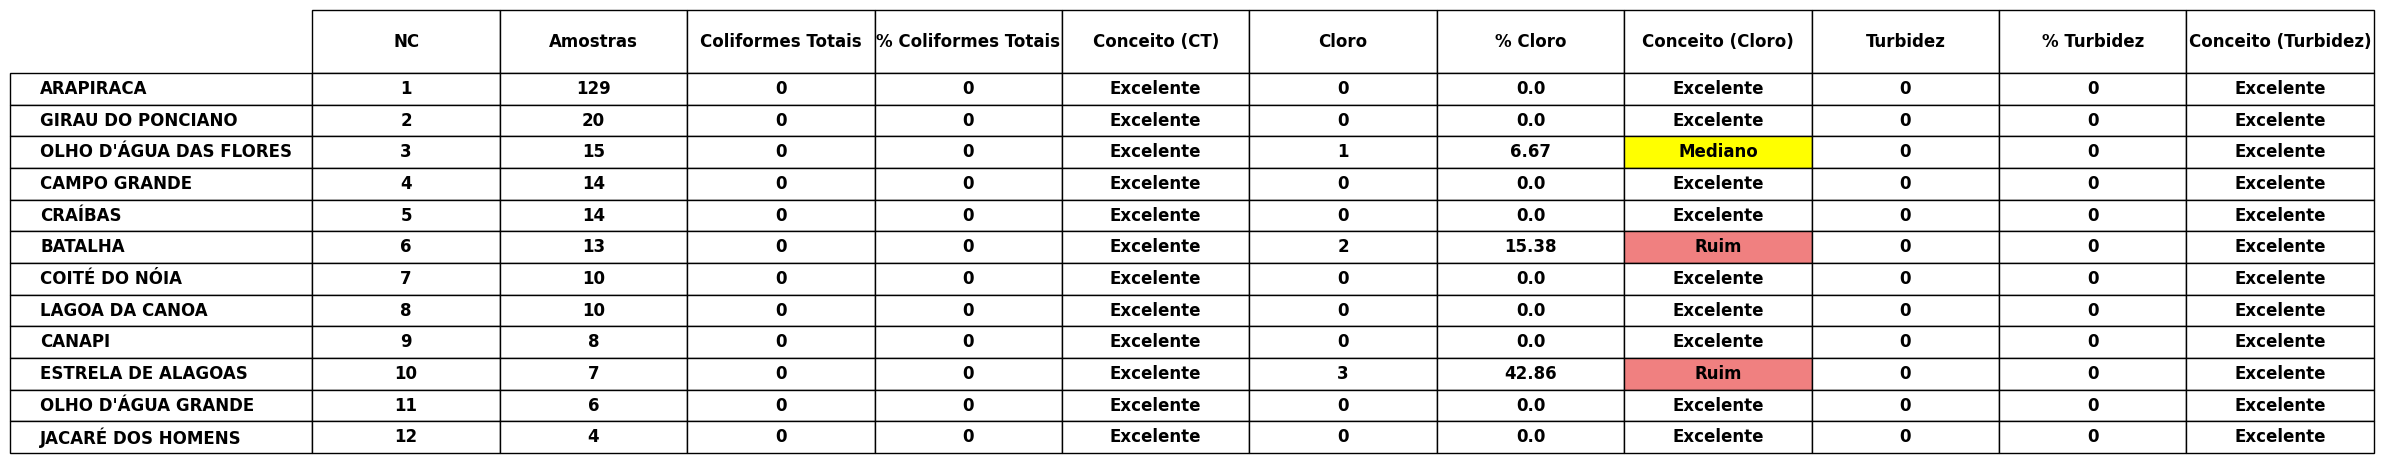

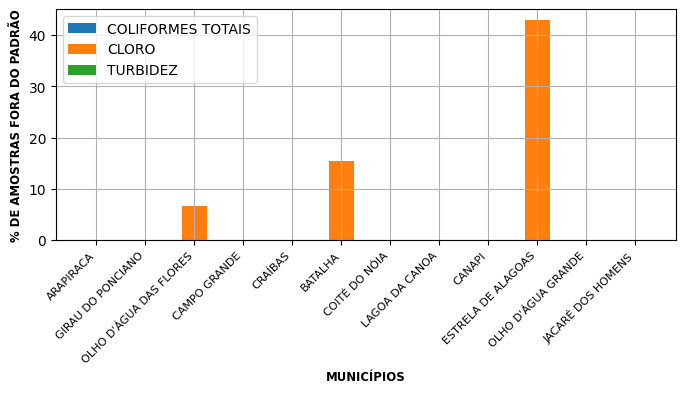

In [183]:
if __name__ == "__main__":main()